In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiments_file_path = r'../output_data/PolicyExperimentsModelVars.csv'
experiments = pd.read_csv(experiments_file_path)
experiments



,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,TotalAdaptationCosts,TotalCostsOfSubsidies,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,10,1000,80,harvey,watts_strogatz,0,547,5.027045e+07,5.309668e+07,2564255,0,25308.236360,47509.807723,123146.743364,4.985298,1.649578,1.424533
1,3,0,13,1000,80,harvey,watts_strogatz,3,504,5.562505e+07,5.904467e+07,2489584,2193261,25385.554811,50419.049139,144717.910297,5.063186,1.683922,1.644145
2,5,1,16,1000,80,harvey,watts_strogatz,1,270,6.535436e+07,6.890133e+07,2335100,2080955,35161.595192,62343.902063,155665.476535,7.127477,2.130792,1.770557
3,6,1,2,1000,80,harvey,watts_strogatz,2,221,6.790505e+07,7.170349e+07,435261,104769,33854.446692,68924.379204,145196.653022,6.588759,2.288570,1.633531
4,1,0,40,1000,80,harvey,watts_strogatz,1,509,4.618316e+07,4.874305e+07,16305684,15351336,32190.808519,40938.515650,114997.736905,6.539605,1.396216,1.376119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,393,98,67,1000,80,harvey,watts_strogatz,1,549,4.184376e+07,4.413929e+07,19203091,18048534,26757.532477,37692.123313,100075.333194,5.344150,1.271788,1.140591
396,397,99,37,1000,80,harvey,watts_strogatz,1,424,5.027989e+07,5.334825e+07,12289408,11513502,31488.794985,49351.589613,103608.689845,6.418353,1.718952,1.196742
397,396,99,76,1000,80,harvey,watts_strogatz,0,598,4.437372e+07,4.690955e+07,5224195,0,20640.930284,40562.507698,133267.580259,4.025576,1.354676,1.540452
398,398,99,65,1000,80,harvey,watts_strogatz,2,608,3.778193e+07,3.986203e+07,17336201,18800024,22396.673267,35616.576766,94936.710288,4.400960,1.193583,1.055452


In [15]:
intervals = [0, 20, 40, 60, 80]
custom_labels = ['0-20', '20-40', '40-60', '60-80']

# Create a new column representing the clusters
experiments['Cluster'] = pd.cut(experiments['Step'], bins=intervals, labels=custom_labels)
#Make separate dataframes for each experiment
package_1 = experiments[experiments['subsidies_package'] == 1]
package_2 = experiments[experiments['subsidies_package'] == 2]
package_3 = experiments[experiments['subsidies_package'] == 3]
no_subsidy = experiments[experiments['subsidies_package'] == 0]

#To check if it worked
package_1

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,TotalAdaptationCosts,TotalCostsOfSubsidies,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold,Cluster
2,5,1,16,1000,80,harvey,watts_strogatz,1,270,6.535436e+07,6.890133e+07,2335100,2080955,35161.595192,62343.902063,155665.476535,7.127477,2.130792,1.770557,0-20
4,1,0,40,1000,80,harvey,watts_strogatz,1,509,4.618316e+07,4.874305e+07,16305684,15351336,32190.808519,40938.515650,114997.736905,6.539605,1.396216,1.376119,20-40
9,9,2,53,1000,80,harvey,watts_strogatz,1,551,4.741050e+07,5.025243e+07,14767617,13877558,34116.692178,44979.905400,91370.359939,6.987522,1.540175,1.059892,40-60
11,13,3,16,1000,80,harvey,watts_strogatz,1,329,6.323374e+07,6.690533e+07,3659249,3272841,33444.830696,63546.504795,140265.534661,7.125629,2.162158,1.628198,0-20
17,17,4,51,1000,80,harvey,watts_strogatz,1,531,4.768637e+07,5.058906e+07,14505772,13620323,30563.261052,44838.542878,102767.371055,6.239413,1.514653,1.169930,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,385,96,16,1000,80,harvey,watts_strogatz,1,281,6.261327e+07,6.660700e+07,1845341,1607864,32170.866926,60170.742408,159355.703413,6.323770,2.063762,1.808794,0-20
383,381,95,77,1000,80,harvey,watts_strogatz,1,558,4.102238e+07,4.366966e+07,20518284,19336306,23259.905431,37956.557732,94242.998293,4.543803,1.269140,1.092518,60-80
388,389,97,26,1000,80,harvey,watts_strogatz,1,490,5.342084e+07,5.674965e+07,9674874,9007486,31018.907480,51120.838563,116837.576722,5.976894,1.736893,1.344965,20-40
395,393,98,67,1000,80,harvey,watts_strogatz,1,549,4.184376e+07,4.413929e+07,19203091,18048534,26757.532477,37692.123313,100075.333194,5.344150,1.271788,1.140591,60-80


In [6]:
experiment_data = pd.DataFrame({
    'No subsidy': no_subsidy['AverageDamagePerPoorHousehold'],
    'Package 1': package_1['AverageDamagePerPoorHousehold'],
    'Package 2': package_2['AverageDamagePerPoorHousehold'],
    'Package 3': package_3['AverageDamagePerPoorHousehold']
})

sns.lineplot(x='Time', y='No subsidy', data=experiment_data )
sns.lineplot(x='Time', y='Package 1', data=experiment_data)
sns.lineplot(x='Date', y='Package 2', data=experiment_data)


ValueError: Could not interpret value `Time` for `x`. An entry with this name does not appear in `data`.

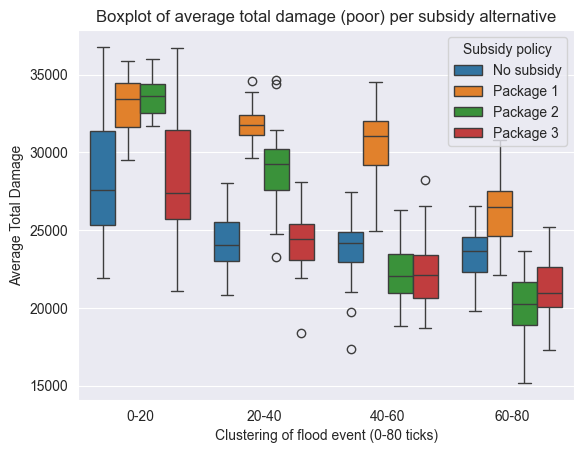

In [19]:
# Define the intervals for clustering and provide labeling. 


# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data_experiments = pd.DataFrame({
    'Flood event': experiments['Cluster'],
    'No subsidy': no_subsidy['AverageDamagePerPoorHousehold'],
    'Package 1': package_1['AverageDamagePerPoorHousehold'],
    'Package 2': package_2['AverageDamagePerPoorHousehold'], 
    'Package 3': package_3['AverageDamagePerPoorHousehold']
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments, id_vars=['Flood event'], var_name='Subsidy policy', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Subsidy policy'])

plt.title('Boxplot of average total damage (poor) per subsidy alternative')
plt.xlabel('Clustering of flood event (0-80 ticks)')
plt.ylabel('Average Total Damage')

output_path_experiments = r'../result_figures/Boxplot_Experiments.png'
plt.savefig(output_path_experiments)
plt.show()


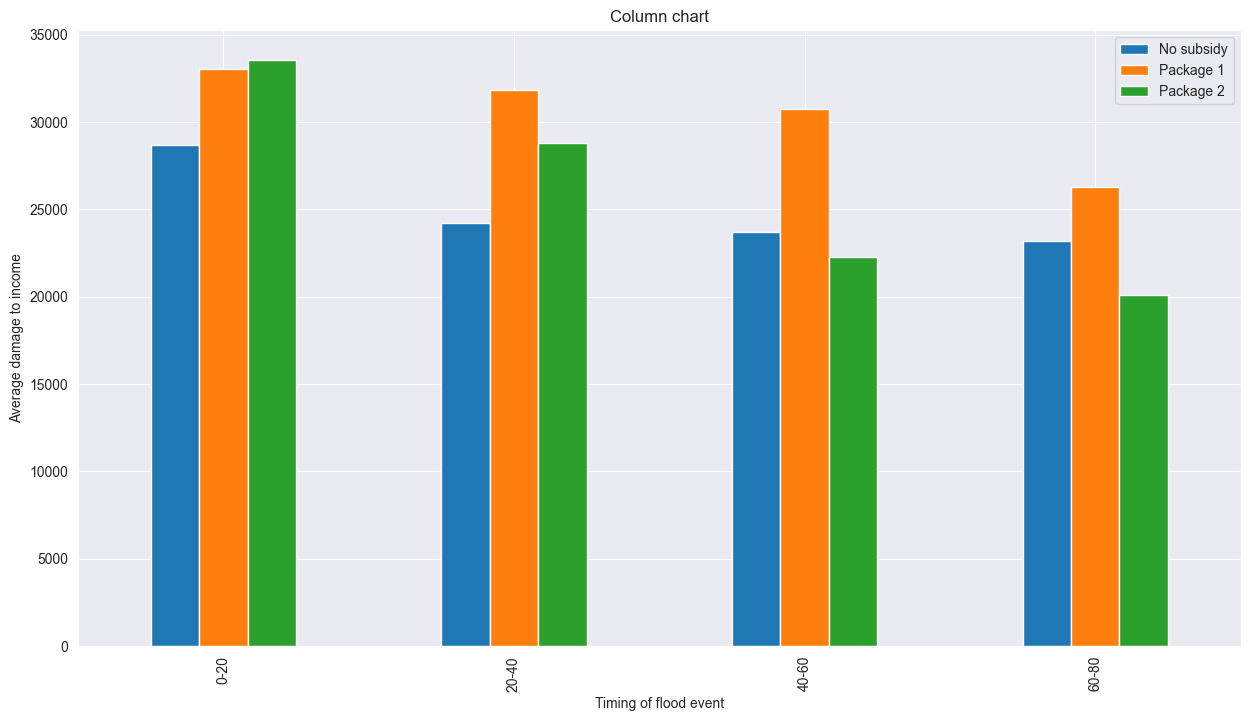

In [21]:
# Create the plotdata DataFrame - we have not used this, because afterwards we chose for boxplots. But it was a way to experiment with the data.
plotdata2 = pd.DataFrame({
    "No subsidy": no_subsidy.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean(),
    "Package 1": package_1.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean(),
    "Package 2": package_2.groupby('Cluster')['AverageDamagePerPoorHousehold'].mean()
})

# Display the result
plotdata2.plot(kind="bar", figsize=(15, 8))

plt.title("Column chart")
plt.xlabel("Timing of flood event")
plt.ylabel("Average damage to income")

plt.show()